# Aproximação de Dados - Parte

 _Prof. Dr. Tito Dias Júnior_

## **Regressão Polinomial**
Considerando as fórmulas para os mínimos quadrados para os coeficientes de um polinômio de 2° grau:

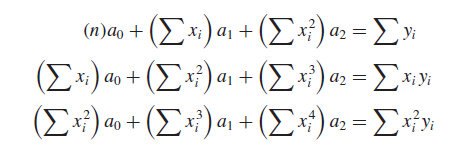

 
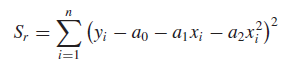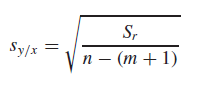

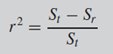
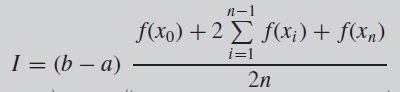

## Exemplo 3

Ajuste um polinômio do segundo grau aos dados nas primeiras duas colunas da Tabela 17.4. E calcule o desvio padrão total, o erro padrão da estimativa e o coeficiente de correlação 

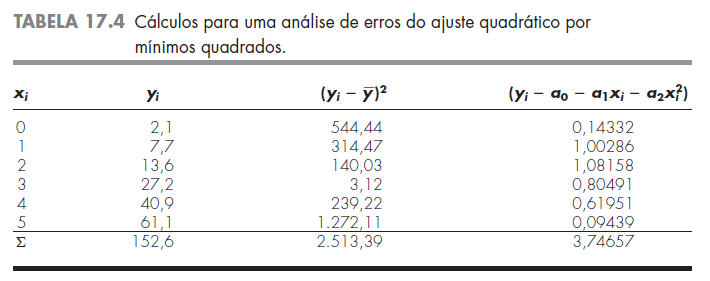
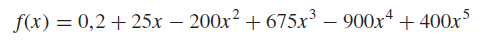

[[  6.  15.  55.]
 [ 15.  55. 225.]
 [ 55. 225. 979.]]
[[ 152.6]
 [ 585.6]
 [2488.8]]
a0 =  [2.47857143]  a1 =  [2.35928571]  a2 =  [1.86071429]
R2 =  [0.99850936]


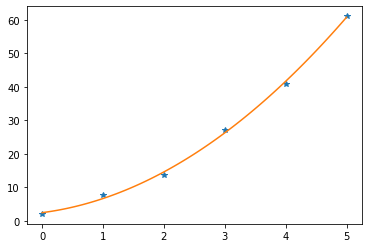

In [27]:
# Algoritmo para ajuste de curvas por regressão linear para um polinômio de 2° grau
import numpy as np            # Importa módulo numpy para criação das matrizes e vetores
from scipy import linalg      # Importa módulo linalg para solução de sistemas lineares
import matplotlib.pyplot as plt 

# Dados
x = [0, 1, 2, 3, 4, 5]
y = [2.1, 7.7, 13.6, 27.2, 40.9, 61.1]
n = len(x)


# Cálculo dos somatórios necessários
Soma_xy = 0
Soma_x2y = 0
Soma_x = 0
Soma_y = 0
Soma_x2 = 0
Soma_x3 = 0
Soma_x4 = 0
Soma_y_y = 0
Erro = 0
for i in range(0,n):
    Soma_xy = Soma_xy + x[i]*y[i]
    Soma_x2y = Soma_x2y + y[i]*x[i]**2
    Soma_x = Soma_x + x[i]
    Soma_y = Soma_y + y[i]
    Soma_x2 = Soma_x2 + x[i]*x[i]
    Soma_x3 = Soma_x3 + x[i]**3
    Soma_x4 = Soma_x4 + x[i]**4
       
y_med = Soma_y/n # Média de y
x_med = Soma_x/n # Média de x

M =  np.array([[n, Soma_x, Soma_x2], 
               [Soma_x, Soma_x2, Soma_x3], 
               [Soma_x2, Soma_x3,Soma_x4]], dtype=np.float)

b =  np.array([[Soma_y],[Soma_xy],[Soma_x2y]])
a = linalg.solve(M, b)
yr = np.zeros(100)
xr = np.linspace(x[0], x[n-1], 100)

for i in range(0,n):
    Soma_y_y = Soma_y_y + (y[i]-y_med)**2
    Erro = Erro + ( y[i] - a[0] - a[1]*x[i] - a[2]*x[i]**2 )**2
    
for i in range(0,len(xr)):    
    yr[i] = a[0] + a[1]*xr[i] + a[2]*xr[i]**2
    
St = Soma_y_y
Sr = Erro
R2 = (St-Sr)/St

print('a0 = ', a[0], ' a1 = ', a[1], ' a2 = ', a[2] )
print('R2 = ', R2)
 
plt.figure()
plt.plot(x,y, '*')
plt.plot(xr,yr)




## Exercício 1

Ajuste os seguintes dados com um modelo de potências ($y = ax^b$). Use a equação de potência resultante para prever y em x = 9:

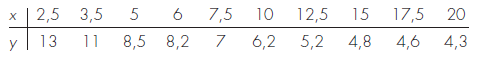

Considerando a equação a ser ajustada e sua linearização a seguir:

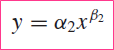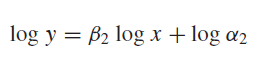

In [14]:
# Algoritmo para ajuste de curvas por regressão linear
import numpy as np            # Importa módulo numpy para criação das matrizes e vetores

# Dados
dados_x = [1, 2, 3, 4, 5]
x = np.log10(dados_x)
print(x)
dados_y = [0.5, 1.7, 3.4, 5.7, 8.4]
y = np.log10(dados_y)
n = 5


# Cálculo dos somatórios necessários
Soma_xy = 0
Soma_x = 0
Soma_y = 0
Soma_x2 = 0
Soma_y_y = 0
Erro = 0
for i in range(0,n):
    Soma_xy = Soma_xy + x[i]*y[i]
    Soma_x = Soma_x + x[i]
    Soma_y = Soma_y + y[i]
    Soma_x2 = Soma_x2 + x[i]*x[i]
       
y_med = Soma_y/n # Média de y
x_med = Soma_x/n # Média de x
a1 =  (n*Soma_xy - Soma_x*Soma_y) / (n*Soma_x2 - Soma_x**2) 
a0 = y_med - a1*x_med

for i in range(0,n):
    Soma_y_y = Soma_y_y + (y[i]-y_med)**2
    Erro = Erro + (y[i] - a0 -a1*x[i])**2

St = Soma_y_y
Sr = Erro
R2 = (St-Sr)/St

print('a0 = ', a0, ' a1 = ', a1)
print('R2 = ', R2)


[0.         0.30103    0.47712125 0.60205999 0.69897   ]
a0 =  -0.300219794569931  a1 =  1.75172364807736
R2 =  0.999967195116412
b2 =  0.500933649097749


## Exercício 2

Ajuste um modelo exponencial ( $y = ae^{bx}$ ) a

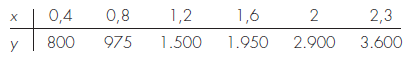


Plote os resultados.



## Referências

Kiusalaas, J. (2013). **Numerical Methods in Engineering With Python 3**. Cambridge: Cambridge.<br>
Brasil, R.M.L.R.F, Balthazar, J.M., Góis, W. (2015) **Métodos Numéricos e Computacionais na Prática de Engenharias e Ciências**, São Paulo: Edgar Blucher